# Twitter Sentiment Analysis

This Twitter Sentiment Analysis project is meant to use python libraries in order to extract tweets using twitter API, clean the tweets, and creating machine learning models as predictive models to predict the sentiment of future tweets. The notebook will be as following:
- installing and importing necessary libraries
- Twitter API Key Config & Connection Establishment
- Data collection
- Data Cleaning/Pre-processing
- Data Labelling
- Visualizations
- Data Splitting
- Model Training and Predictions
- Insights and Conclusions

# Installing and Importing Necessary Libraries

In [108]:
# !pip install tweepy
# !pip install textblob
# !pip install wordcloud
# !pip install emot
# !pip install emoji==1.7
# !pip install unidecode
# !pip install imbalanced-learn
# !pip install afinn
# !pip install imbalanced-learn


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import string
import sys
import tweepy

# ML Libraries
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC

# Sampling Libraries
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#nltk Libraries
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Labelling libraries
from textblob import TextBlob
from afinn import Afinn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#sklearn Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#others Libraries
from wordcloud import WordCloud
import pickle
# from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from emot.emo_unicode import UNICODE_EMOJI
from PIL import Image
from collections import Counter




pd.options.display.max_colwidth = 1000

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loa

In [144]:
import warnings
warnings.filterwarnings('ignore')

# Twitter API Key Config & Connection Establishment

In [145]:
# Importing the keys #
consumerKey = "YuUnu8vCYEsGOsbnxNmJZbgWj"
consumerSecret = "5MtV7HuQCimsEwFWftXPZcqnb9AsNboBJDbiqYWWjxxqWOwIcP"
accessToken = "1617558376677769219-JpnZxxiuALvfUxJ20SfguQaldcDy5P"
accessTokenSecret = "I7bxLu8H3Ezf8S8KGqOEezYICbtVwoqQFzlL59Y75cb0D"
# Establish the connection with API #
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Data Collection

In [147]:
# Search for the Term and define number of tweets 
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

Enter Keyword/Tag to search about: chatgpt
Enter how many tweets to search: 500


In [149]:
# extract tweets using searchTerm and NoOfTerms
# geocode = "25.204849,55.270783,30km" in order to seach by the longitude and latitude or dubai giving 30km radius
tweets = tweepy.Cursor(api.search_tweets, q=searchTerm,lang = "en", geocode = "25.204849,55.270783,30km", tweet_mode="extended").items(NoOfTerms)

In [150]:
#Converting the tweets into a list format for easy handling or pre-processing
newlist=[]
for tweet in tweets:
    newlist.append(tweet.full_text)

In [151]:
newlist

["Don't trust Google translator. Way off 😅\n\n#ChatGPT will be game changer.",
 '@chiaseedpuddin How is chatgpt for writing poetry?',
 "As an Arabic teacher, I used ChatGPT to create personalized reading plans for my students based on their interests and reading levels. The program's recommendations are impressive! Highly recommend giving it a try.\n #ChatGPT #ArabicTeaching #PersonalizedLearning https://t.co/yxBYZoBjkf",
 'Here is a great list of 20 Popular Blockchain Analytics Tools and Companies by @CoinMarketCap \n\nhttps://t.co/mIROtmEyVN\n\n#Crypto #CryptoCommunity #ChatGPT #Web3 #LatestNews #Bitcoin #BTC #Ethereum #ETH #altcoins #Binance #ElonMusk',
 "@MarioNawfal I always type 'Kindly' to ChatGPT. I need to stop",
 'Fake ChatGPT Chrome extension targeted Facebook Ad accounts: ChatGPT has garnered a lot of questions about its security and capacity for manipulation, partly because it is a new software that has seen unprecedented growth (hosting 100 million users just… https://t.c

In [152]:
#Number or tweets available in twitter about chatgpt ONLY in Dubai
len(newlist)

324

In [45]:
#Creating Dataframe 
df = pd.DataFrame(newlist,columns=['tweets'])
df.head()

,tweets
0,Elon Musk Drops Hint of ChatGPT Rival 'BasedAI' \n\n.@elonmusk .@LouisVuitton .@OpenAI\n\n#BasedAI #ElonMusk #ChatGPT #Chatbot #AI\nhttps://t.co/H3iO4vWBaF
1,@Safa_Fattani 😅 it’s good to know ChatGPT can be beaten
2,Investors are going nuts for ChatGPT-ish artificial intelligence. Even @elonmusk wants his own AI chatbot \n#Artificial_Intelligence #data #chatgpt
3,Atlassian provides a range of tools and solutions that can help companies improve their IT Service Management (ITSM) processes. Here are a few ways in which Atlassian can help:\n\n- Jira Service Desk: Jira Service Desk is a service management tool that\n\nhttps://t.co/eb1BUdmrVl
4,Did ChatGPT write this story ? https://t.co/3Lv1T0hLbf


In [275]:
# df.to_csv('chatgpt_df_421TweetsScrapedForDubai.csv')
# saving the dataframe into a csv
df = pd.read_csv('chatgpt_df_421TweetsScrapedForDubai.csv')

# Data Cleaning/Pre-processing

We will talk about the basic steps of text preprocessing. 
These steps are needed for transferring text from human language to machine-readable format for further processing. 

1. Drop duplicates if any before pre-processing
2. Remove hashtag and usernames prefixed with #, @
3. Remove html links
4. Remove punctuations
5. Remove Stopwords
6. Convert to lower case
7. Converting Emojis to equivalent words to capture emotions :)
8. Lemmatization

### Why did we choose Lemma rather than Stemma??!

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

However, the two words differ in their flavor. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word (root), which is known as the lemma .

Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

**However, for our application of twitter sentiment analyis, we choose to go with 'Lemmatization', since our root words are vital for our derived sentiments.**


**Can i do both lemmatization and stemming?**

Do not apply both. Remember that stemming and lemmatization are normalization techniques, and it is recommended to use only one approach to normalize


In [276]:
# 'Emoji_Dict.p'- download link https://drive.google.com/open?id=1G1vIkkbqPBYPKHcQ8qy0G2zkoab2Qv4v
with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
#         print(emot)
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split())+" ", text)
    return text

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


In [277]:
stp_words = stopwords.words('english')
words = set(nltk.corpus.words.words())

def cleanTweet(tweet):
    cleanTweet = re.sub(r'@[A-Z0-9a-z]+',' ',tweet)#Remove @text
    cleanTweet = re.sub(r'#[a-zA-Z0-9]+',' ',cleanTweet) #Remove hashtags
    cleanTweet = re.sub('RT[\s]+',' ',cleanTweet) #Remove RT (retweets)
    cleanTweet = re.sub(r'_',' ',cleanTweet) #Replace underscores with spaces to make meaningful words
    cleanTweet = remove_html(cleanTweet)
    cleanTweet = cleanTweet.lower() #lower case
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words) #Remove stopwords
    cleanTweet = re.sub('https?://[A-Za-z0-9./]+',' ',cleanTweet) #Remove links
    cleanTweet = remove_punctuation(cleanTweet) # Remove Punctuations
    cleanTweet = re.sub(r'[^\w\s]', ' ', cleanTweet) # Remove some other punctuation marks
    #Removing words which does not add value for this use case like the search term itself..
    cleanTweet = re.sub(r'chatgpt',' ',cleanTweet)
    cleanTweet = re.sub(r'chat gpt',' ',cleanTweet)
    cleanTweet = re.sub(r' s ',' ',cleanTweet)
    #Removing s, since s is one of the frequent word appearing in word cloud and doesn't make any value
    return cleanTweet

[CV 4/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.600 total time=   0.0s
[CV 4/5] END alpha=0.01, binarize=None, class_prior=None, fit_prior=True;, score=0.600 total time=   0.0s
[CV 1/5] END alpha=0.01, binarize=None, class_prior=None, fit_prior=False;, score=0.619 total time=   0.0s
[CV 3/5] END alpha=0.01, binarize=None, class_prior=None, fit_prior=False;, score=0.550 total time=   0.0s
[CV 1/5] END alpha=0.01, binarize=None, class_prior=[0.1, 0.1], fit_prior=True;, score=0.619 total time=   0.0s
[CV 2/5] END alpha=0.01, binarize=None, class_prior=[0.1, 0.1], fit_prior=True;, score=0.667 total time=   0.0s
[CV 5/5] END alpha=0.01, binarize=None, class_prior=[0.1, 0.1], fit_prior=True;, score=0.500 total time=   0.0s
[CV 1/5] END alpha=0.01, binarize=None, class_prior=[0.1, 0.1], fit_prior=False;, score=0.619 total time=   0.0s
[CV 3/5] END alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True;, score=0.550 total time=   0.0s
[CV 4/5] END alpha=0.01, binarize=0

In [278]:
# Drop duplicates from dataframe if any
df.drop_duplicates()
# Convert emoji into words
df['cleanTweetsEmojiConverted'] = df['tweets'].apply(convert_emojis_to_word)
# Apply pre-processing steps 
df['cleanTweets'] = df['cleanTweetsEmojiConverted'].apply(cleanTweet)
# Lemmatization
df["cleanTweets_Lemmatized"] = df["cleanTweets"].apply(lambda text: lemmatize_words(text))
# dropping unnecessary columns
df = df.drop('cleanTweetsEmojiConverted', axis=1)
df = df.drop('cleanTweets',axis=1)

ha=1.0, binarize=8.5, class_prior=[0.1, 0.1], fit_prior=True;, score=0.500 total time=   0.0s
[CV 4/5] END alpha=1.0, binarize=8.5, class_prior=[0.1, 0.1], fit_prior=True;, score=0.500 total time=   0.0s
[CV 5/5] END alpha=1.0, binarize=8.5, class_prior=[0.1, 0.1], fit_prior=True;, score=0.500 total time=   0.0s
[CV 5/5] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=True;, score=0.500 total time=   0.0s
[CV 1/5] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.476 total time=   0.0s
[CV 2/5] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.476 total time=   0.0s
[CV 2/5] END alpha=1.0, binarize=10.0, class_prior=[0.1, 0.1], fit_prior=False;, score=0.476 total time=   0.0s
[CV 3/5] END alpha=1.0, binarize=10.0, class_prior=[0.1, 0.1], fit_prior=False;, score=0.500 total time=   0.0s
[CV 4/5] END alpha=1.0, binarize=10.0, class_prior=[0.1, 0.1], fit_prior=False;, score=0.500 total time=   0.0s
[CV 4/5] END alpha=10.0, binarize

[CV 4/5] END alpha=10.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.500 total time=   0.0s
[CV 2/5] END alpha=10.0, binarize=10.0, class_prior=[0.1, 0.1], fit_prior=True;, score=0.476 total time=   0.0s
[CV 1/5] END alpha=10.0, binarize=10.0, class_prior=[0.1, 0.1], fit_prior=False;, score=0.476 total time=   0.0s
[CV 1/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.667 total time=   0.0s
[CV 2/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.667 total time=   0.0s
[CV 5/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.450 total time=   0.0s
[CV 1/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.714 total time=   0.0s
[CV 3/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.550 total time=   0.0s
[CV 4/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.600 total time=   0.0s
[CV 5/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.450 total time=   0.0s
[CV 1/5] END alpha=0.01, cl

In [279]:
df.head(5)

,Unnamed: 0,tweets,cleanTweets_Lemmatized
0,0,Elon Musk Drops Hint of ChatGPT Rival 'BasedAI' \n\n.@elonmusk .@LouisVuitton .@OpenAI\n\n#BasedAI #ElonMusk #ChatGPT #Chatbot #AI\nhttps://t.co/H3iO4vWBaF,elon musk drop hint rival basedai
1,1,@Safa_Fattani 😅 it’s good to know ChatGPT can be beaten,fattani smiling face open mouth cold sweat it good know beaten
2,2,Investors are going nuts for ChatGPT-ish artificial intelligence. Even @elonmusk wants his own AI chatbot \n#Artificial_Intelligence #data #chatgpt,investor going nut ish artificial intelligence even want ai chatbot intelligence
3,3,Atlassian provides a range of tools and solutions that can help companies improve their IT Service Management (ITSM) processes. Here are a few ways in which Atlassian can help:\n\n- Jira Service Desk: Jira Service Desk is a service management tool that\n\nhttps://t.co/eb1BUdmrVl,atlassian provides range tool solution help company improve service management itsm process way atlassian help jira service desk jira service desk service management tool
4,4,Did ChatGPT write this story ? https://t.co/3Lv1T0hLbf,write story


# Data Labelling

- 1 --> Positive
- 0 --> Neutral
- -1--> Negative


## Method 1 : TextBlob

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In our use case, we are going to use 'Sentiment Analysis' feature of TEXTBLOB to retrieve the polarity of tweets to analyse and store sentiments.


In [280]:
def label_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0.00:
        return '1'
    elif analysis.sentiment.polarity == 0.00:
        return '0'
    elif analysis.sentiment.polarity < 0.00:
        return '-1'

In [281]:
sentiment = []
for tweet in df['cleanTweets_Lemmatized']:
    sentiment.append(label_sentiment(tweet))
df['sentiment_textBlob'] = sentiment    


In [282]:
df.head(50)

,Unnamed: 0,tweets,cleanTweets_Lemmatized,sentiment_textBlob
0,0,Elon Musk Drops Hint of ChatGPT Rival 'BasedAI' \n\n.@elonmusk .@LouisVuitton .@OpenAI\n\n#BasedAI #ElonMusk #ChatGPT #Chatbot #AI\nhttps://t.co/H3iO4vWBaF,elon musk drop hint rival basedai,0
1,1,@Safa_Fattani 😅 it’s good to know ChatGPT can be beaten,fattani smiling face open mouth cold sweat it good know beaten,1
2,2,Investors are going nuts for ChatGPT-ish artificial intelligence. Even @elonmusk wants his own AI chatbot \n#Artificial_Intelligence #data #chatgpt,investor going nut ish artificial intelligence even want ai chatbot intelligence,-1
3,3,Atlassian provides a range of tools and solutions that can help companies improve their IT Service Management (ITSM) processes. Here are a few ways in which Atlassian can help:\n\n- Jira Service Desk: Jira Service Desk is a service management tool that\n\nhttps://t.co/eb1BUdmrVl,atlassian provides range tool solution help company improve service management itsm process way atlassian help jira service desk jira service desk service management tool,0
4,4,Did ChatGPT write this story ? https://t.co/3Lv1T0hLbf,write story,0
5,5,Investors are going nuts for ChatGPT-ish artificial intelligence...\n\nEven Elon Musk wants his own AI chatbot...\n\nChatgpt and its fellow chatbots may be much talked about (and talked to: Chatgpt may now have more than 100m users). https://t.co/znv4PeLBr6,investor going nut ish artificial intelligence even elon musk want ai chatbot fellow chatbots may much talked and talked to may 100m user,-1
6,6,"@csdojo404 on chatgpt api, there is an issue in terms of aggregating the data whereas the min and max version of the questions, it able to answer those questions successfully",api issue term aggregating data whereas min max version question able answer question successfully,1
7,7,ChatGPT is breaking in our life. Many experts say that is the future of work and learning. I have the controversial position. In my opinion ChatGPT doesn't help you - he gives you only 1 answer and tryes to convince you that is tru…https://t.co/4ffRQbNxoy https://t.co/x2vdiVWBux,breaking life many expert say future work learning controversial position opinion help give 1 answer tryes convince tru,1
8,8,These challenges apply to education but also open up a myriad of opportunities #chatgpt #ai @GrapheastEdu #dubaiadobeday https://t.co/OyHXAU9wPw,challenge apply education also open myriad opportunity,0
9,9,Ok. So I finally took the plunge and created a login for that big AI - chatGPT and needless to say I am having an interesting morning :) #ChatGPT #writing #writingexperience,ok finally took plunge created login big ai needle say interesting morning,1


In [286]:
df['sentiment_textBlob'].value_counts()

1     184
0     170
-1     67
Name: sentiment_textBlob, dtype: int64

Text(0.5, 1.0, 'Tweets Plorality Distribuition using Text Blob')

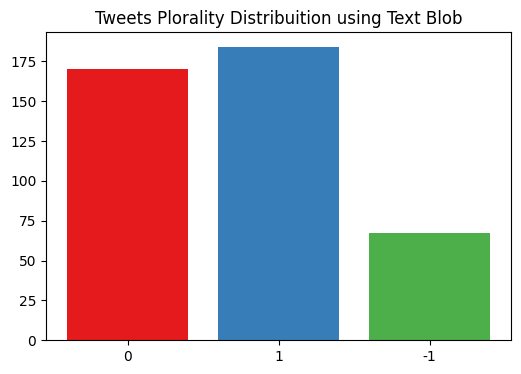

In [287]:
plorality_count = Counter(df.sentiment_textBlob)

plt.figure(figsize=(6,4))
plt.bar(plorality_count.keys(), plorality_count.values(),color=sns.color_palette('Set1'))
plt.title("Tweets Plorality Distribuition using Text Blob")

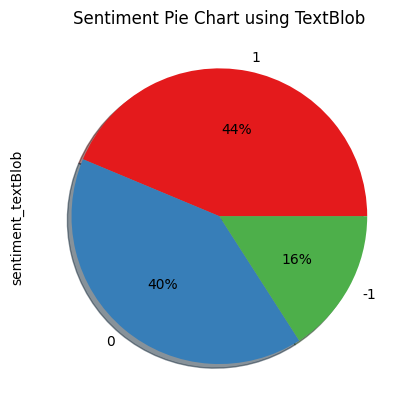

In [288]:
sentiment_count = df.sentiment_textBlob.value_counts()
sentiment_count.plot(kind='pie', autopct='%1.0f%%', shadow=True, colors=sns.color_palette('Set1'), title="Sentiment Pie Chart using TextBlob");

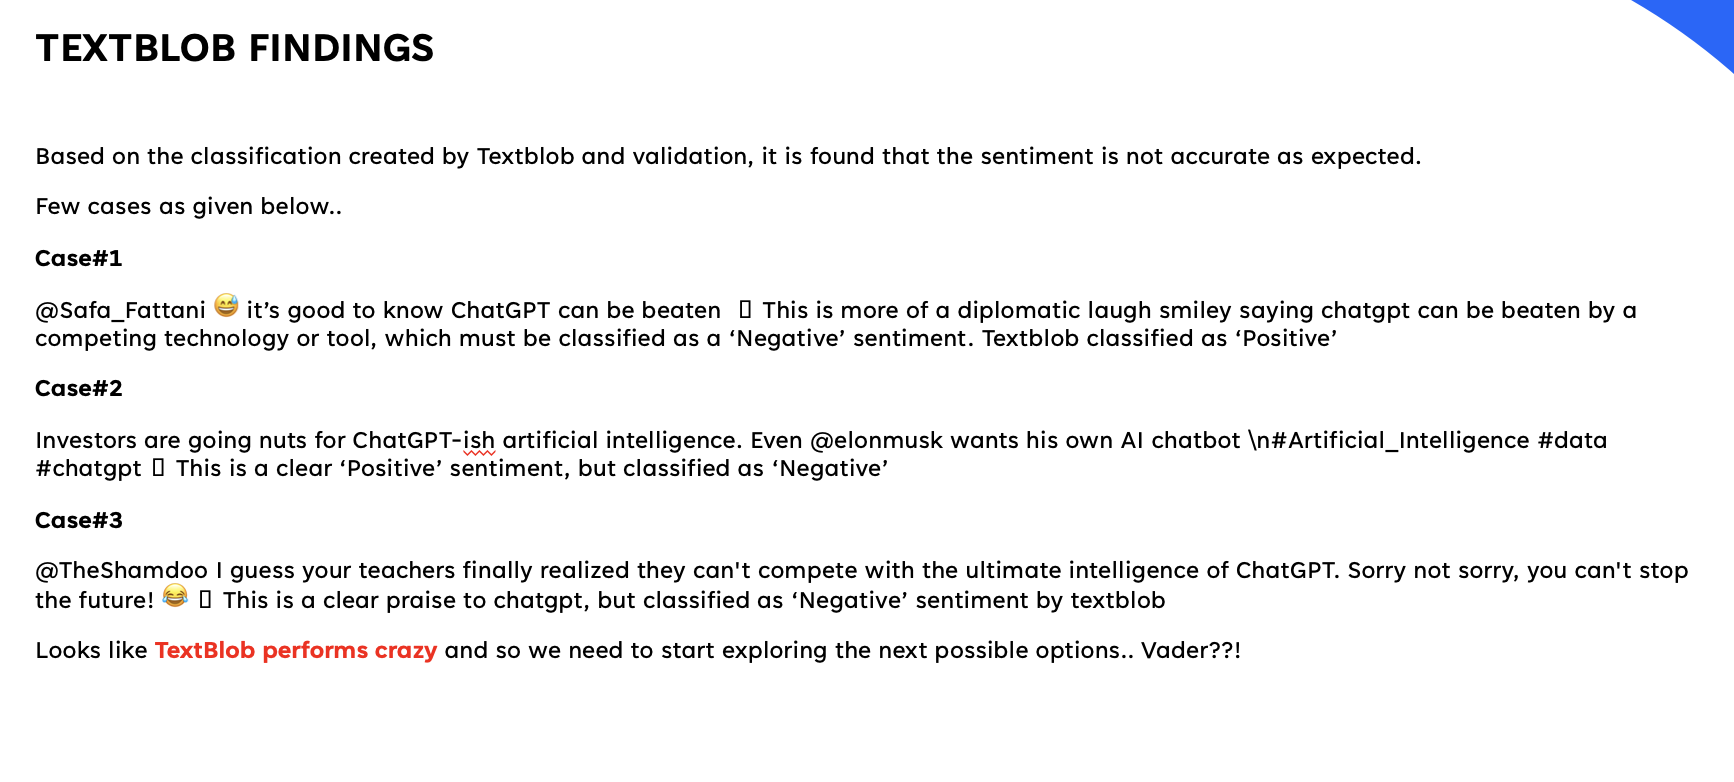


## Method 2 : Vader

VADER (Valence Aware Dictionary for sEntiment Reasoning) is a model used for text sentiment analysis 
that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. Lets analyze how this techinique 
works for our use case..


In [289]:
vds = SentimentIntensityAnalyzer()
def format_output(output_dict):
  
  polarity = "0"

  if(output_dict['compound']>= 0.05):
    polarity = "1"

  elif(output_dict['compound']<= -0.05):
    polarity = "-1"

  return polarity

def predict_sentiment(text):
  
  output_dict =  vds.polarity_scores(text)
  return format_output(output_dict)

df["sentiment_vader"] = df["cleanTweets_Lemmatized"].apply(predict_sentiment)

In [290]:
df.head(50)

,Unnamed: 0,tweets,cleanTweets_Lemmatized,sentiment_textBlob,sentiment_vader
0,0,Elon Musk Drops Hint of ChatGPT Rival 'BasedAI' \n\n.@elonmusk .@LouisVuitton .@OpenAI\n\n#BasedAI #ElonMusk #ChatGPT #Chatbot #AI\nhttps://t.co/H3iO4vWBaF,elon musk drop hint rival basedai,0,-1
1,1,@Safa_Fattani 😅 it’s good to know ChatGPT can be beaten,fattani smiling face open mouth cold sweat it good know beaten,1,1
2,2,Investors are going nuts for ChatGPT-ish artificial intelligence. Even @elonmusk wants his own AI chatbot \n#Artificial_Intelligence #data #chatgpt,investor going nut ish artificial intelligence even want ai chatbot intelligence,-1,1
3,3,Atlassian provides a range of tools and solutions that can help companies improve their IT Service Management (ITSM) processes. Here are a few ways in which Atlassian can help:\n\n- Jira Service Desk: Jira Service Desk is a service management tool that\n\nhttps://t.co/eb1BUdmrVl,atlassian provides range tool solution help company improve service management itsm process way atlassian help jira service desk jira service desk service management tool,0,1
4,4,Did ChatGPT write this story ? https://t.co/3Lv1T0hLbf,write story,0,0
5,5,Investors are going nuts for ChatGPT-ish artificial intelligence...\n\nEven Elon Musk wants his own AI chatbot...\n\nChatgpt and its fellow chatbots may be much talked about (and talked to: Chatgpt may now have more than 100m users). https://t.co/znv4PeLBr6,investor going nut ish artificial intelligence even elon musk want ai chatbot fellow chatbots may much talked and talked to may 100m user,-1,1
6,6,"@csdojo404 on chatgpt api, there is an issue in terms of aggregating the data whereas the min and max version of the questions, it able to answer those questions successfully",api issue term aggregating data whereas min max version question able answer question successfully,1,1
7,7,ChatGPT is breaking in our life. Many experts say that is the future of work and learning. I have the controversial position. In my opinion ChatGPT doesn't help you - he gives you only 1 answer and tryes to convince you that is tru…https://t.co/4ffRQbNxoy https://t.co/x2vdiVWBux,breaking life many expert say future work learning controversial position opinion help give 1 answer tryes convince tru,1,1
8,8,These challenges apply to education but also open up a myriad of opportunities #chatgpt #ai @GrapheastEdu #dubaiadobeday https://t.co/OyHXAU9wPw,challenge apply education also open myriad opportunity,0,1
9,9,Ok. So I finally took the plunge and created a login for that big AI - chatGPT and needless to say I am having an interesting morning :) #ChatGPT #writing #writingexperience,ok finally took plunge created login big ai needle say interesting morning,1,1


In [291]:
df['sentiment_vader'].value_counts()

1     214
0     138
-1     69
Name: sentiment_vader, dtype: int64

Text(0.5, 1.0, 'Tweets Plorality Distribuition using Vader')

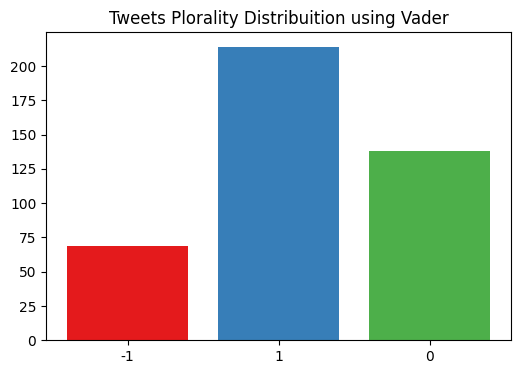

In [292]:
plorality_count = Counter(df.sentiment_vader)

plt.figure(figsize=(6,4))
plt.bar(plorality_count.keys(), plorality_count.values(),color=sns.color_palette('Set1'))
plt.title("Tweets Plorality Distribuition using Vader")

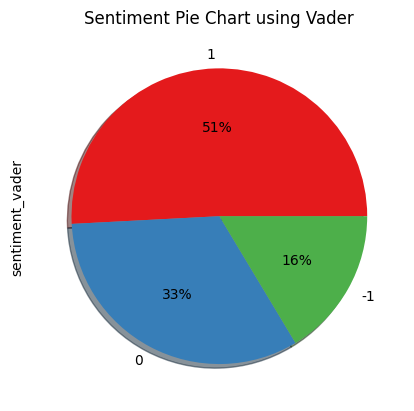

In [293]:
sentiment_count = df.sentiment_vader.value_counts()
sentiment_count.plot(kind='pie', autopct='%1.0f%%', shadow=True, colors=sns.color_palette('Set1'), title="Sentiment Pie Chart using Vader");

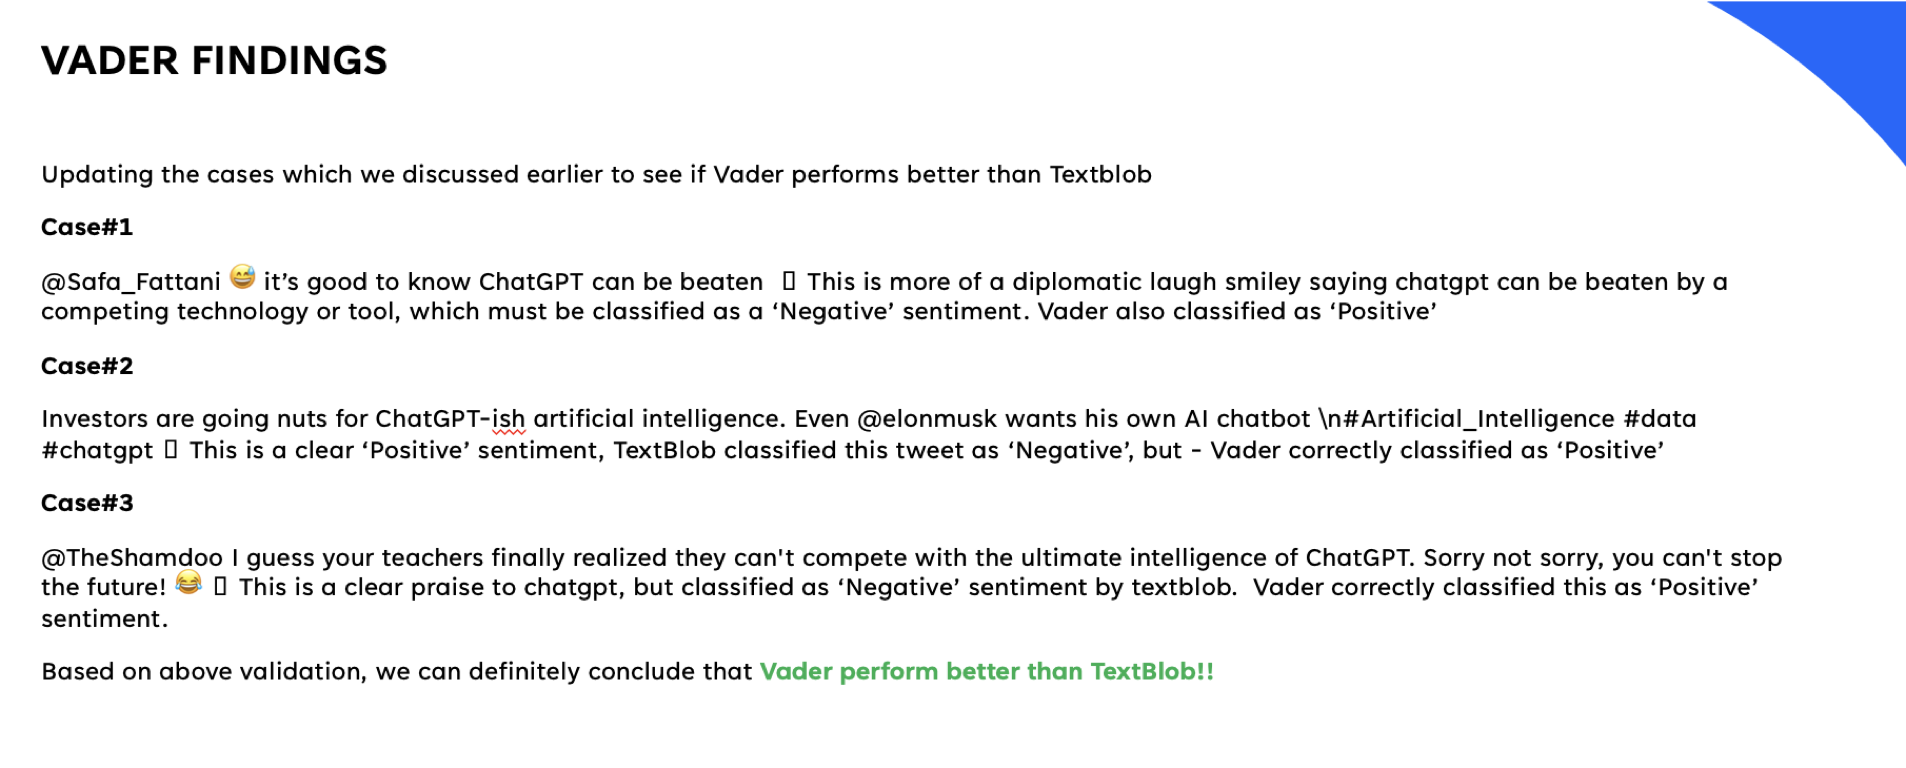

## Method 3 : Affin

Afinn is the simplest yet popular lexicons used for sentiment analysis developed by Finn Årup Nielsen. It contains 3300+ words with a polarity score associated with each word. In python, there is an in-built function for this lexicon. The AFINN lexicon assigns words with a score between -5 and 5, with negative scores indicating negative sentiment and positive scores indicating positive sentiment. 

Exploration starts..

In [294]:
afn = Afinn()
   
scores = [afn.score(tweet) for tweet in df['cleanTweets_Lemmatized']]
afinn_sentiment = ['1' if score > 0
                          else '-1' if score < 0
                              else '0'
                                  for score in scores]
     
df['sentiments_afinn'] = afinn_sentiment

In [295]:
df.head(50)

,Unnamed: 0,tweets,cleanTweets_Lemmatized,sentiment_textBlob,sentiment_vader,sentiments_afinn
0,0,Elon Musk Drops Hint of ChatGPT Rival 'BasedAI' \n\n.@elonmusk .@LouisVuitton .@OpenAI\n\n#BasedAI #ElonMusk #ChatGPT #Chatbot #AI\nhttps://t.co/H3iO4vWBaF,elon musk drop hint rival basedai,0,-1,-1
1,1,@Safa_Fattani 😅 it’s good to know ChatGPT can be beaten,fattani smiling face open mouth cold sweat it good know beaten,1,1,1
2,2,Investors are going nuts for ChatGPT-ish artificial intelligence. Even @elonmusk wants his own AI chatbot \n#Artificial_Intelligence #data #chatgpt,investor going nut ish artificial intelligence even want ai chatbot intelligence,-1,1,1
3,3,Atlassian provides a range of tools and solutions that can help companies improve their IT Service Management (ITSM) processes. Here are a few ways in which Atlassian can help:\n\n- Jira Service Desk: Jira Service Desk is a service management tool that\n\nhttps://t.co/eb1BUdmrVl,atlassian provides range tool solution help company improve service management itsm process way atlassian help jira service desk jira service desk service management tool,0,1,1
4,4,Did ChatGPT write this story ? https://t.co/3Lv1T0hLbf,write story,0,0,0
5,5,Investors are going nuts for ChatGPT-ish artificial intelligence...\n\nEven Elon Musk wants his own AI chatbot...\n\nChatgpt and its fellow chatbots may be much talked about (and talked to: Chatgpt may now have more than 100m users). https://t.co/znv4PeLBr6,investor going nut ish artificial intelligence even elon musk want ai chatbot fellow chatbots may much talked and talked to may 100m user,-1,1,1
6,6,"@csdojo404 on chatgpt api, there is an issue in terms of aggregating the data whereas the min and max version of the questions, it able to answer those questions successfully",api issue term aggregating data whereas min max version question able answer question successfully,1,1,1
7,7,ChatGPT is breaking in our life. Many experts say that is the future of work and learning. I have the controversial position. In my opinion ChatGPT doesn't help you - he gives you only 1 answer and tryes to convince you that is tru…https://t.co/4ffRQbNxoy https://t.co/x2vdiVWBux,breaking life many expert say future work learning controversial position opinion help give 1 answer tryes convince tru,1,1,1
8,8,These challenges apply to education but also open up a myriad of opportunities #chatgpt #ai @GrapheastEdu #dubaiadobeday https://t.co/OyHXAU9wPw,challenge apply education also open myriad opportunity,0,1,1
9,9,Ok. So I finally took the plunge and created a login for that big AI - chatGPT and needless to say I am having an interesting morning :) #ChatGPT #writing #writingexperience,ok finally took plunge created login big ai needle say interesting morning,1,1,1


In [296]:
df['sentiments_afinn'].value_counts()

1     188
0     167
-1     66
Name: sentiments_afinn, dtype: int64

Text(0.5, 1.0, 'Tweets Plorality Distribuition using Afinn')

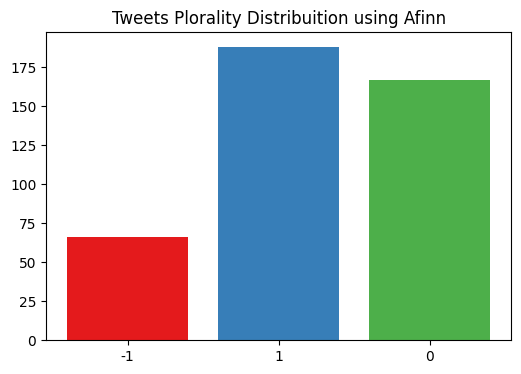

In [297]:
plorality_count = Counter(df.sentiments_afinn)

plt.figure(figsize=(6,4))
plt.bar(plorality_count.keys(), plorality_count.values(),color=sns.color_palette('Set1'))
plt.title("Tweets Plorality Distribuition using Afinn")

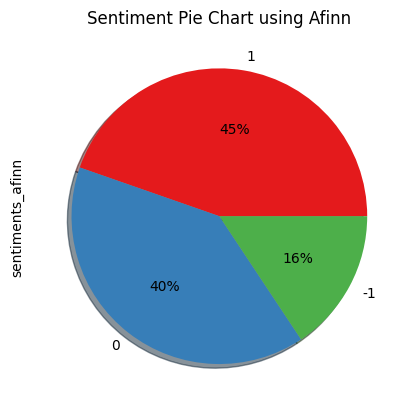

In [298]:
sentiment_count = df.sentiments_afinn.value_counts()
sentiment_count.plot(kind='pie', autopct='%1.0f%%', shadow=True, colors=sns.color_palette('Set1'), title="Sentiment Pie Chart using Afinn");

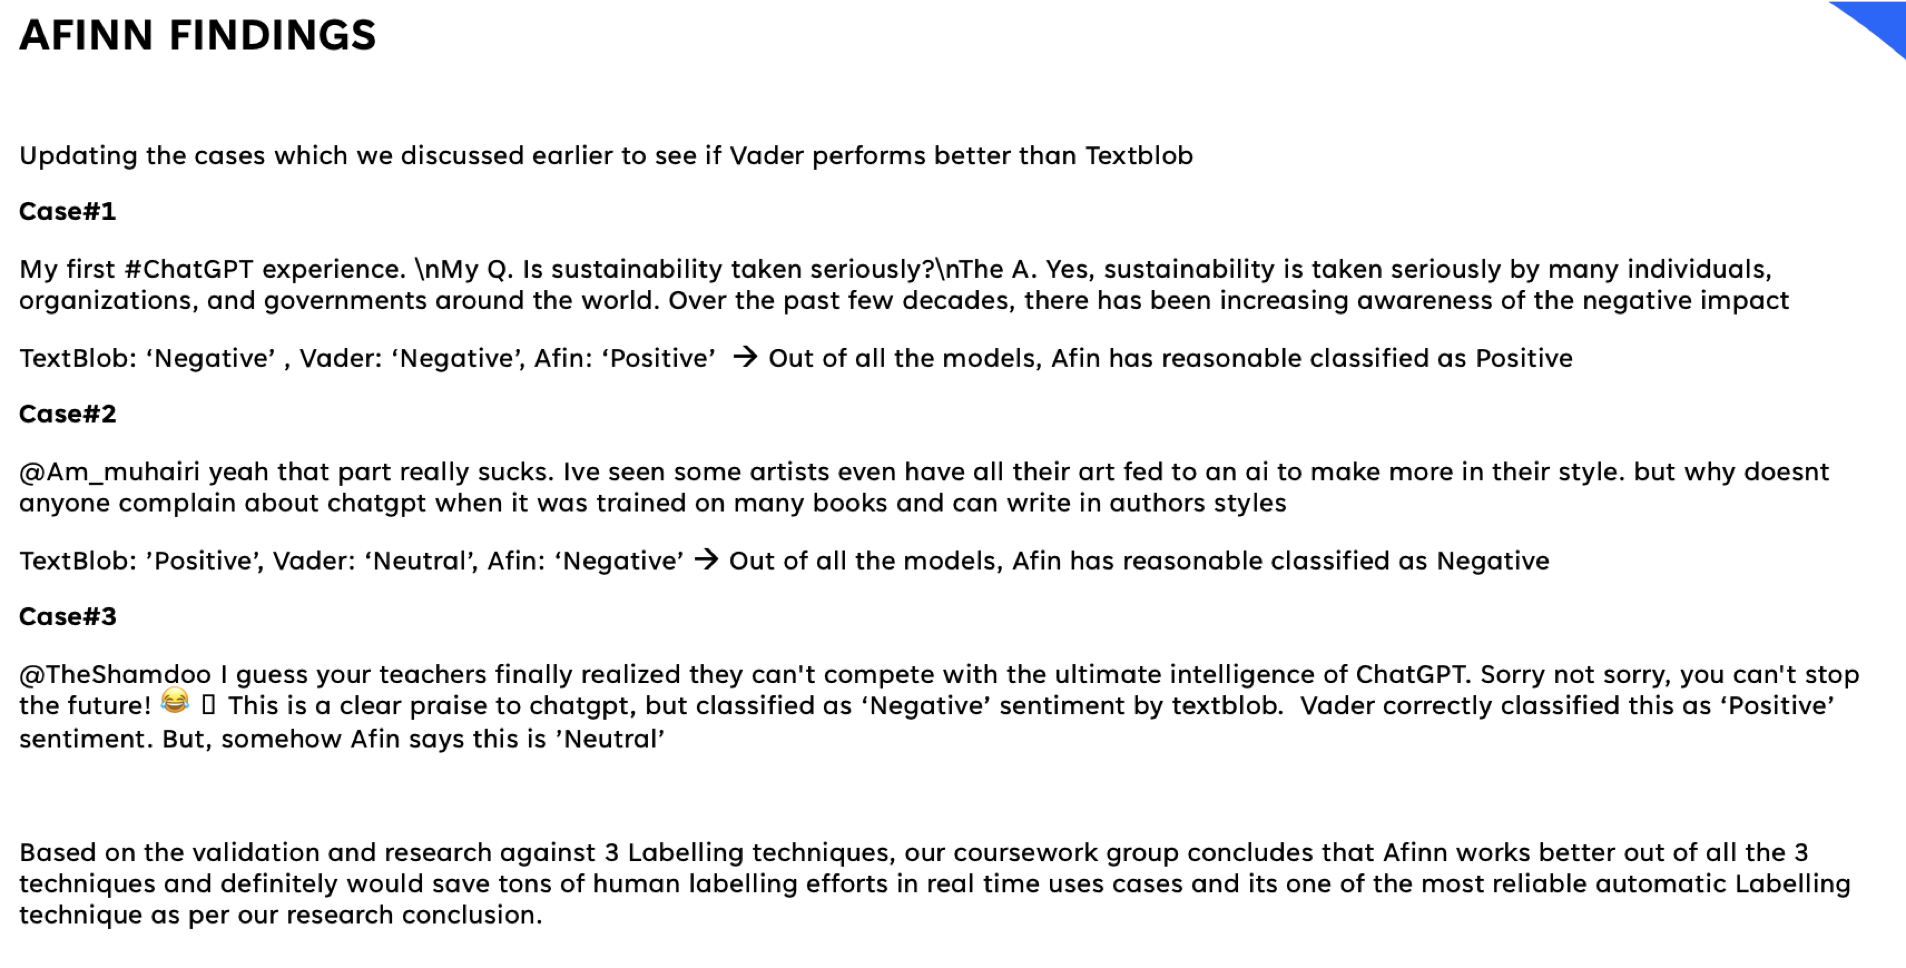

# Visualization and Insights from tweets based on Afinn Sentiments

In [299]:
df_negative = df[df['sentiments_afinn']=="-1"]
df_positive = df[df['sentiments_afinn']=="1"]
df_neutral = df[df['sentiments_afinn']=="0"]

In [300]:
#Function to Create Wordcloud
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    
    mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
    for i in range(len(mask)):
        mask[i] = list(map(transform_format, mask[i]))
    
    wc = WordCloud(background_color='white',
    mask = mask,
    max_words=3000,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud Saved Successfully')
    path='wc.png'
    display(Image.open(path))

# Positive Word Cloud

Word Cloud Saved Successfully


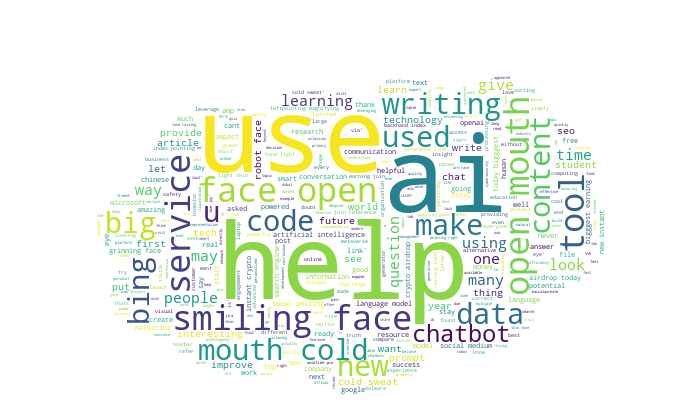

In [301]:
#Creating wordcloud for positive sentiment
create_wordcloud(df_positive.cleanTweets_Lemmatized.values)

# Negative Word Cloud

Word Cloud Saved Successfully


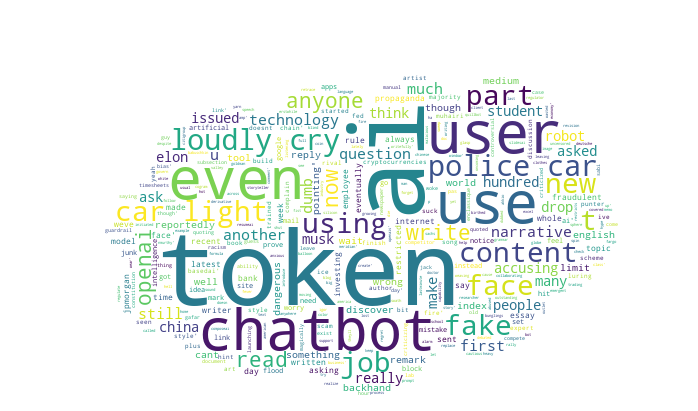

In [302]:
#Creating wordcloud for negative sentiment
create_wordcloud(df_negative.cleanTweets_Lemmatized.values)

## Top 10 positive and negative tweets

In [303]:
# Create variables to hold the average polarity #
positive = 0
negative = 0
neutral = 0
polarity = 0
ptweets= []
ntweets= []

for tweet in df['cleanTweets_Lemmatized']:
    analysis = TextBlob(tweet) 
    polarity += analysis.sentiment.polarity
   
    if(analysis.sentiment.polarity == 0):
        neutral += 1

    elif(analysis.sentiment.polarity < 0.00):
#         print(tweet)
        negative += 1
        ntweets.append(tweet)

    elif(analysis.sentiment.polarity > 0.00):
        positive += 1
        ptweets.append(tweet)

print("****************TOP 10 POSITIVE TWEETS ON CHATGPT IN DUBAI******************************")
for tweet in ptweets[:10]:
    print(ptweets.index(tweet)+1,"-->", tweet)

print("****************TOP 10 NEGATIVE TWEETS ON CHATGPT IN DUBAI******************************")
for tweet in ntweets[:10]:
    print(ntweets.index(tweet)+1,"-->",tweet)
    

****************TOP 10 POSITIVE TWEETS ON CHATGPT IN DUBAI******************************
1 --> fattani smiling face open mouth cold sweat it good know beaten
2 --> api issue term aggregating data whereas min max version question able answer question successfully
3 --> breaking life many expert say future work learning controversial position opinion help give 1 answer tryes convince tru
4 --> ok finally took plunge created login big ai needle say interesting morning
5 --> muhairi yeah part really suck ive seen artist even art fed ai make style doesnt anyone complain trained many book write author style
6 --> alertenterprise reveals guardian ai chatbot powered openai alertenterprise revealed launch guardian ai chatbot powered openai guardian ai chatbot developed worldrenowned gpt3 platform created openai
7 --> robot let touch real world thanks microsoft
8 --> goal solve challenge real estate market leveraging latest powerful technology simplify investment journeychart increasing
9 --> ne

## Public Sentiment on CHATGPT in Dubai (Overall : Positive)

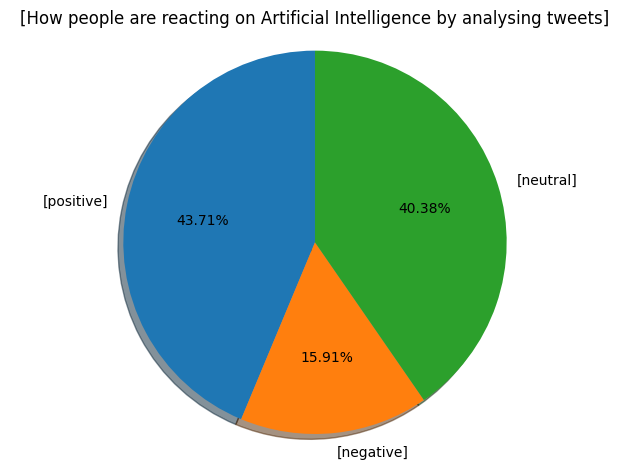

In [304]:
def percentage(uper, lower):
    return 100*float(uper)/float(lower)

count=0
positive=0
negative=0
nutral=0
polarity=0
for tweet in df['cleanTweets_Lemmatized']:
     analysis = TextBlob(tweet)
     polarity +=analysis.sentiment.polarity
     if(analysis.sentiment.polarity==0):
         nutral += 1
     elif(analysis.sentiment.polarity<0.00):
         negative += 1
     elif(analysis.sentiment.polarity>0.00):
         positive += 1

positive=percentage(positive,100)
negative=percentage(negative,100)
nutral=percentage(nutral,100)

labels=['[positive]', '[negative]','[neutral]']
sizes=[positive,negative,nutral]
colors=['yellowgreen',"gold","red"]
chart=plt.pie(sizes,labels=labels, startangle=90, autopct='%.2f%%',shadow=True)
plt.title("[How people are reacting on {} by analysing tweets]".format("Artificial Intelligence"))
plt.axis("equal")
plt.tight_layout()
plt.show()

## Top 10 Frequent words as per the tweet collections

In [305]:
from collections import Counter
cnt = Counter()
for text in df["cleanTweets_Lemmatized"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('ai', 119),
 ('face', 52),
 ('use', 33),
 ('new', 30),
 ('tool', 26),
 ('like', 24),
 ('using', 24),
 ('chatbot', 23),
 ('light', 23),
 ('smiling', 21)]

## Top 10 Frequent bi/Trigrams

In [306]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['cleanTweets_Lemmatized'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [307]:
df_ngram = df_ngram.sort_values(by = 'frequency', ascending = False)
df_ngram.head(10)

,frequency,bigram/trigram
0,19,police car light
2,19,car light
1,19,police car
3,16,smiling face
4,16,artificial intelligence
5,14,open mouth
6,14,face open mouth
7,14,face open
8,13,open mouth cold
10,13,mouth cold


# Text Analytics pipeline on tweets

In [308]:
# creating a new data frame with only cleaned lemmatized tweets and the afinn sentiments
new_df = df[['cleanTweets_Lemmatized','sentiments_afinn']]

In [309]:
# Drop neutral sentiment rows since which don't want to train that sentiment
new_df.drop(new_df[new_df['sentiments_afinn']=="0"].index, inplace=True)

In [310]:
new_df.head(5)

,cleanTweets_Lemmatized,sentiments_afinn
0,elon musk drop hint rival basedai,-1
1,fattani smiling face open mouth cold sweat it good know beaten,1
2,investor going nut ish artificial intelligence even want ai chatbot intelligence,1
3,atlassian provides range tool solution help company improve service management itsm process way atlassian help jira service desk jira service desk service management tool,1
5,investor going nut ish artificial intelligence even elon musk want ai chatbot fellow chatbots may much talked and talked to may 100m user,1


In [311]:
new_df['sentiments_afinn'].value_counts()

1     188
-1     66
Name: sentiments_afinn, dtype: int64

Here we can see that the majority of tweets are positive and they are around 2.8 times the negative tweets, that is why we will do sampling in order to have a balanced class df.

In [312]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df["cleanTweets_Lemmatized"], new_df["sentiments_afinn"], test_size=0.2, random_state=42)

# Convert the text into a numerical representation using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000, stop_words="english")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  3470


In [328]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))

Counter({'-1': 51, '1': 51})


In [369]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))

Counter({'1': 152, '-1': 152})


In [370]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate and False Positive Rate. The near the model is to the top left corner, the better the model.

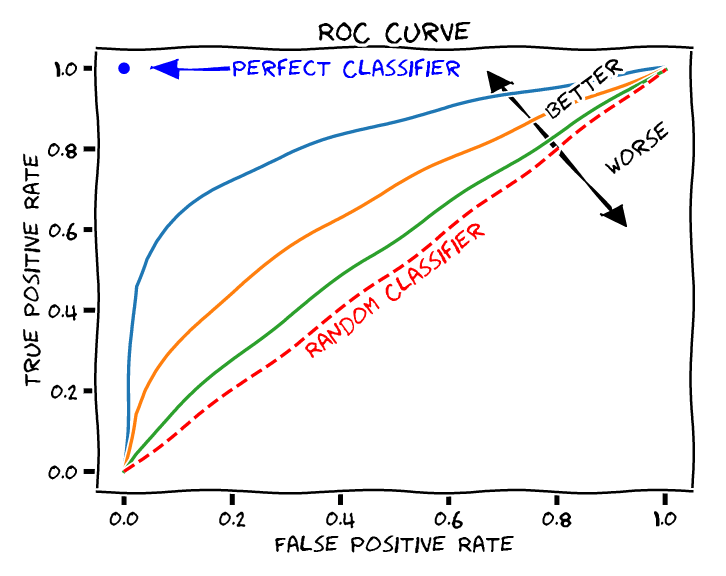

## 1) Multinomial Naive Bayes Model 

In [371]:
# number of unique classes (used later in "class_prior parameter")
n_classes = np.unique(y_train)

# tuning the multinomial NB using the gridsearch
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ]
         }

MNNBGRID = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
MNNBGRID.fit(X_over, y_over)

print('Best Accuracy Through Grid Search : {:.3f}'.format(MNNBGRID.best_score_))
print('Best Parameters : {}\n'.format(MNNBGRID.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.931
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}



              precision    recall  f1-score   support

          -1       0.62      0.33      0.43        15
           1       0.77      0.92      0.84        36

    accuracy                           0.75        51
   macro avg       0.70      0.62      0.64        51
weighted avg       0.73      0.75      0.72        51



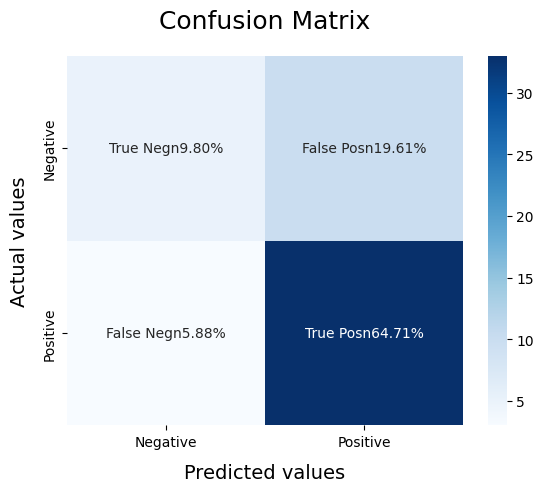

In [372]:
# initializing the model
clf = MultinomialNB(alpha= 0.01, class_prior= None, fit_prior= True)
# fitting the model using X_over and y_over (after undersampling)
clf.fit(X_over, y_over)
# evaluating the model
model_Evaluate(clf)
# predicting
y_pred4 = clf.predict(X_test)

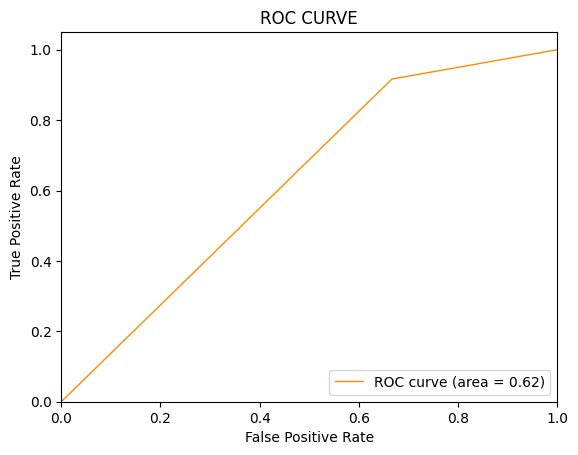

In [373]:
# printing ROC curve in order to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred4.astype(int))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## 2) BernoulliNB Model

In [374]:
# number of unique classes (used later in "class_prior parameter")
n_classes = np.unique(y_train)

# tuning the Bernoulli NB using the gridsearch
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

BNBGRID = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
BNBGRID.fit(X_over, y_over)

print('Best Parameters : {}'.format(BNBGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(BNBGRID.best_score_))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 0.01, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.934



              precision    recall  f1-score   support

          -1       0.62      0.33      0.43        15
           1       0.77      0.92      0.84        36

    accuracy                           0.75        51
   macro avg       0.70      0.62      0.64        51
weighted avg       0.73      0.75      0.72        51



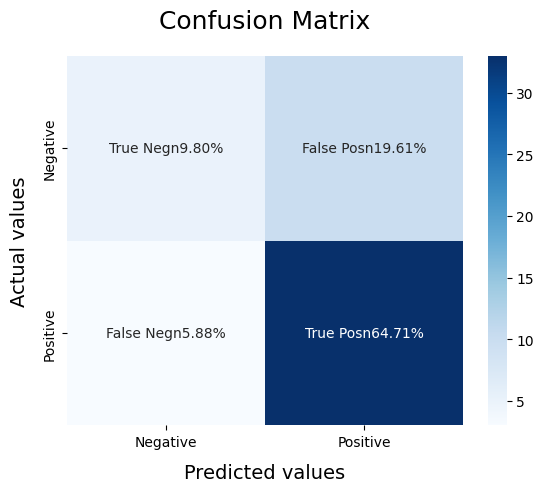

In [375]:
# initializing the model
BNBmodel = BernoulliNB(alpha = 0.01, binarize = 0.0, class_prior = None, fit_prior=True)
# fitting the model using X_over and y_over (after undersampling)
BNBmodel.fit(X_over, y_over)
# evaluating the model
model_Evaluate(BNBmodel)
# predicting
y_pred1 = BNBmodel.predict(X_test)


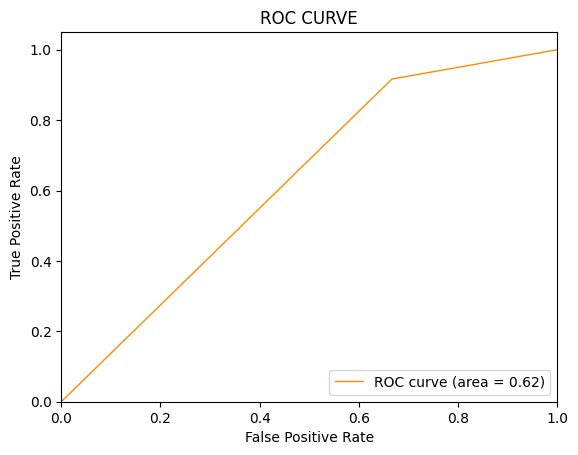

In [376]:
# printing ROC curve in order to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred1.astype(int))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## 3) Tuning SVC Model

In [377]:
# tuning the SVC using the gridsearch

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly']} 
  
SVCGRID = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
SVCGRID.fit(X_over, y_over)

print('Best Parameters : {}'.format(SVCGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(SVCGRID.best_score_))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.492 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.492 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.492 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.492 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.492 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.492 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.492 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.492 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.683 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.492 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.492 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.492 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.492 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.885 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.951 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.492 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.492 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.492 total time=   0.0s
[CV 4/5] END ......C=1, gamm

[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.492 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.492 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.492 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.492 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.885 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.951 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.492 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.492 total time=   0.0s
[CV 3/5] END ...C=10, gamma=

[CV 3/5] END ....C=1000, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.885 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.951 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.984 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.885 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.951 total time=   0.0s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END .C=1000, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .C=1000, gamma=

              precision    recall  f1-score   support

          -1       0.67      0.13      0.22        15
           1       0.73      0.97      0.83        36

    accuracy                           0.73        51
   macro avg       0.70      0.55      0.53        51
weighted avg       0.71      0.73      0.65        51



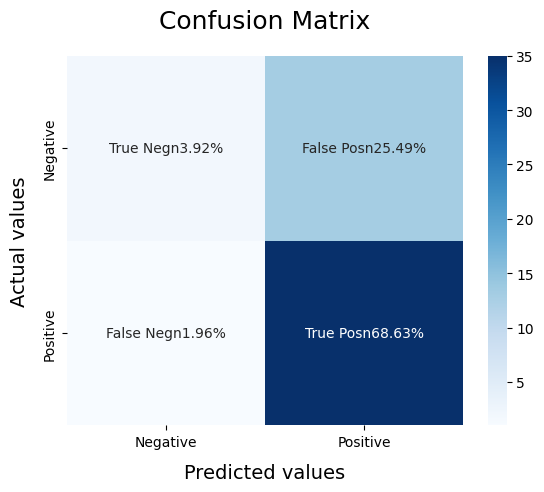

In [378]:
# initializing the model
SVCmodel = SVC(C = 1, gamma = 1, kernel = 'linear')
# fitting the model using X_over and y_over (after undersampling)
SVCmodel.fit(X_over, y_over)
# evaluating the model
model_Evaluate(SVCmodel)
# predicting
y_pred2 = SVCmodel.predict(X_test)

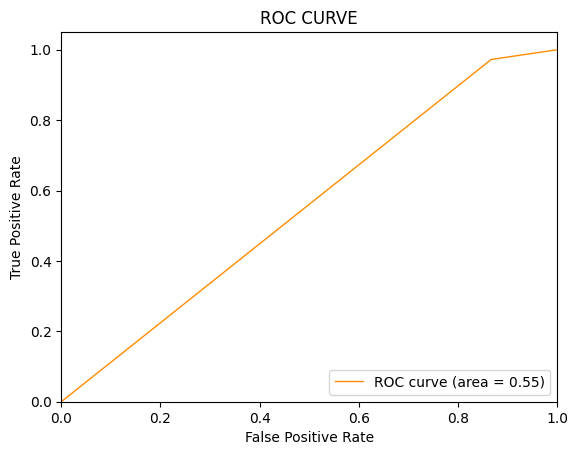

In [379]:
# printing ROC curve in order to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred2.astype(int))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## 4) Logistic Regression Model

In [380]:
# tuning the LR using the gridsearch

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],}

logreg = LogisticRegression()
LRGRID = GridSearchCV(logreg,                 # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

LRGRID.fit(X_over, y_over)

print('Best Parameters : {}'.format(LRGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(LRGRID.best_score_))



Best Parameters : {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Accuracy Through Grid Search : 0.974



              precision    recall  f1-score   support

          -1       0.75      0.20      0.32        15
           1       0.74      0.97      0.84        36

    accuracy                           0.75        51
   macro avg       0.75      0.59      0.58        51
weighted avg       0.75      0.75      0.69        51



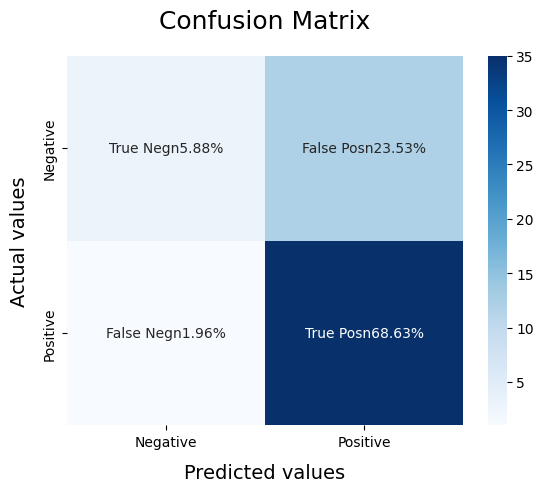

In [381]:
# initializing the model
LRmodel = LogisticRegression(C = 10, max_iter = 1000, n_jobs=-1, penalty = 'l2', solver = 'newton-cg')
# fitting the model using X_over and y_over (after undersampling)
LRmodel.fit(X_over, y_over)
# evaluating the model
model_Evaluate(LRmodel)
# predicting
y_pred3 = LRmodel.predict(X_test)

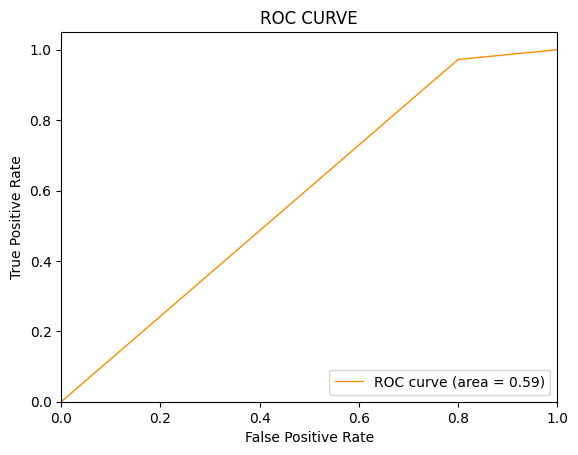

[CV 3/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.650 total time=   0.0s
[CV 4/5] END alpha=0.5, class_prior=None, fit_prior=False;, score=0.650 total time=   0.0s
[CV 5/5] END alpha=0.5, class_prior=None, fit_prior=False;, score=0.650 total time=   0.0s
[CV 1/5] END alpha=0.5, class_prior=[0.1, 0.1], fit_prior=True;, score=0.619 total time=   0.0s
[CV 2/5] END alpha=0.5, class_prior=[0.1, 0.1], fit_prior=True;, score=0.619 total time=   0.0s
[CV 5/5] END alpha=1.0, class_prior=None, fit_prior=True;, score=0.650 total time=   0.0s
[CV 1/5] END alpha=1.0, class_prior=None, fit_prior=False;, score=0.619 total time=   0.0s
[CV 2/5] END alpha=1.0, class_prior=None, fit_prior=False;, score=0.619 total time=   0.0s
[CV 3/5] END alpha=1.0, class_prior=None, fit_prior=False;, score=0.600 total time=   0.0s
[CV 5/5] END alpha=1.0, class_prior=[0.1, 0.1], fit_prior=False;, score=0.650 total time=   0.0s
[CV 2/5] END alpha=10.0, class_prior=None, fit_prior=True;, score=0.619 tot

[CV 4/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.750 total time=   0.0s
[CV 2/5] END alpha=0.01, class_prior=[0.1, 0.1], fit_prior=True;, score=0.714 total time=   0.0s
[CV 5/5] END alpha=0.01, class_prior=[0.1, 0.1], fit_prior=True;, score=0.650 total time=   0.0s
[CV 2/5] END alpha=0.01, class_prior=[0.1, 0.1], fit_prior=False;, score=0.714 total time=   0.0s
[CV 4/5] END alpha=0.01, class_prior=[0.1, 0.1], fit_prior=False;, score=0.750 total time=   0.0s
[CV 1/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.619 total time=   0.0s
[CV 1/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.619 total time=   0.0s
[CV 1/5] END alpha=0.1, class_prior=[0.1, 0.1], fit_prior=True;, score=0.619 total time=   0.0s
[CV 2/5] END alpha=0.1, class_prior=[0.1, 0.1], fit_prior=True;, score=0.667 total time=   0.0s
[CV 5/5] END alpha=0.1, class_prior=[0.1, 0.1], fit_prior=True;, score=0.650 total time=   0.0s
[CV 1/5] END alpha=0.1, class_prior=[0.1, 0.1], fi

[CV 1/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.714 total time=   0.0s
[CV 5/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.650 total time=   0.0s
[CV 2/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.714 total time=   0.0s
[CV 4/5] END alpha=0.01, class_prior=None, fit_prior=False;, score=0.750 total time=   0.0s
[CV 1/5] END alpha=0.01, class_prior=[0.1, 0.1], fit_prior=True;, score=0.714 total time=   0.0s
[CV 4/5] END alpha=0.01, class_prior=[0.1, 0.1], fit_prior=True;, score=0.750 total time=   0.0s
[CV 5/5] END alpha=0.01, class_prior=[0.1, 0.1], fit_prior=False;, score=0.650 total time=   0.0s
[CV 2/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.667 total time=   0.0s
[CV 4/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.650 total time=   0.0s
[CV 2/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.667 total time=   0.0s
[CV 4/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.650

In [382]:
# printing ROC curve in order to evaluate the performance of a classification model

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred3.astype(int))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Discussion and conclusion from experiments

## Labelling tweets:

labelling was done by applying three different labelling techniques (TextBlob, Vader, Afinn) on the tweets. Then, random sampling was performed on the labelled tweets for validation against the **ground truth (human validation)**. And it was proven that Afinn technique was working the best in our case therefore we chose it.

## General Sentiment of "ChatGPT" in UAE
Overall the response is a mixed and confused emotions for now which almost approximatly 85% sentiments with positive and neutral sentiments, since people are still getting used to the new Generative AI environment and trying to get the maximum out of it, wheras only there approximatly 15% negative sentiments on ChatGPT in UAE. 

## Hyper-parameter Tuning and Model Conclusion

The following experiments were done to improve the performance of the following four models {Multinomial NB, Bernoulli NB, SVC, Logistic Regression} :

1) **Experiment 1:** Running the model without tuning nor balancing:
First of all, we initialized and fit the models without balancing the unbalanced class of postive tweets and negative tweets nor hyper-parameter tuning. The results were actually biased because the confusion matrixes showed that the models were not predicting any negative tweets whether TN or FN. In addition, our ROC curve was actually flat 0.5.

2) **Experiment 2:** Running the model with tuning but without balancing:
Then, we did hyper-parameter tuning using Gridsearch for the four models we chose, and the accuracies slightly improved however the models were still biased because of the same previously mentioned reason in Experiment 1.

3) **Experiment 3:** Running the model with tuning and under-sampling:
because of the imbalanced classes of postive tweets and negative tweets {"positive": 188, "negative": 66}, undersampling was done in order to balance the classes to {"positive": 51, "negative": 51}. This acutally **significantly** affected our models' performances because our models are finally predicting negative sentiments, and our confusion matrixes are showing TN and FN. The below table shows the accuracy of the four different models over three runs in addition to their averages.

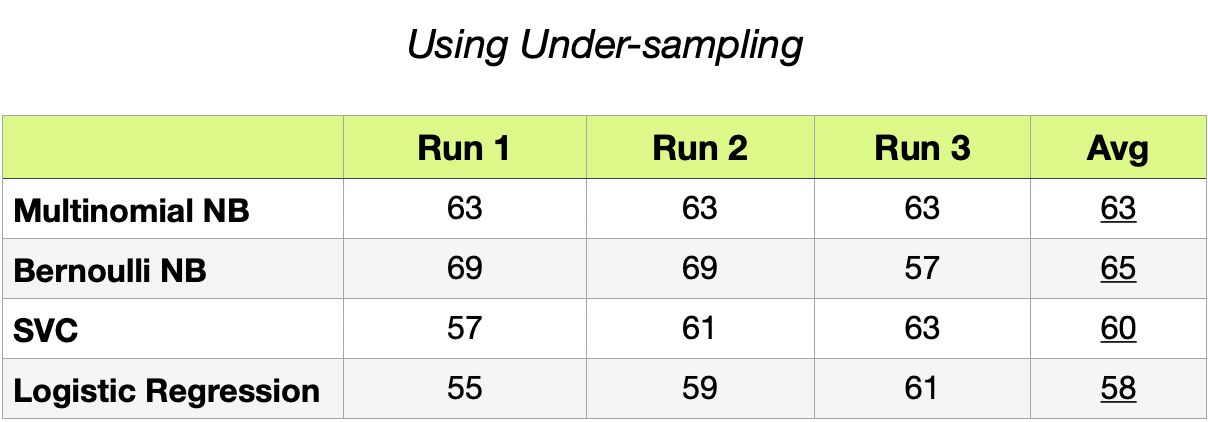



4) **Experiment 4:** Running the model with tuning and over-sampling:
Lastly, we applied oversampling to avoid the imabalanced classes we have. After oversampling the distribution of class was {"positive": 152, "negative": 152}. The accuracies were quite better using this approach because we kind of have enough number of positive and negative sentiments for the model to get trained. We can see that **Bernoulli NB** yeild the highest accuracy of 75% on average of three runs.

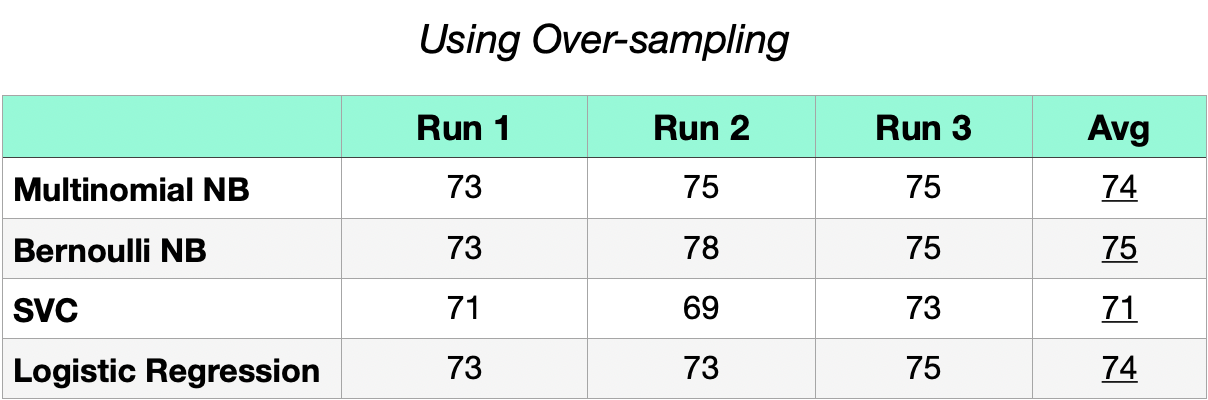

## Conclusion:
The Bernoulli NB model yeild the best accuarcy using undersampling and oversampling. Although accuracy was one of the wellknown metric to be considered for model evaluation. The F1-score, which is one of the most importanat evaluation metrics in machine learning models, in some of the real time use cases this becomes the relying metrics as well. It elegantly sums up the predictive performance of a model by combining two other metrics which are precision and recall.
The weighted average of the total f1-score is around 72%. The f1-score for predicting negative sentiments is 43% where the f1-score for predicting positive sentiments is 84%. This further has a scope for improvment in the future.

## How useful such findings could be in practice?
In our case we found out that a great number of people are kind of confused and do not actually know if the usefulness of chatGPT is actually a good thing because it is still new to the market. However, there is a great number of positive sentiments which means that people are actually finding it helpfull in various activities in life. Nonetheless, still there is a minimal number of people rejecting the idea of this new technology.